# Imports

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import numpy as np

import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'lib')))
from new_numba import *

# RG flow

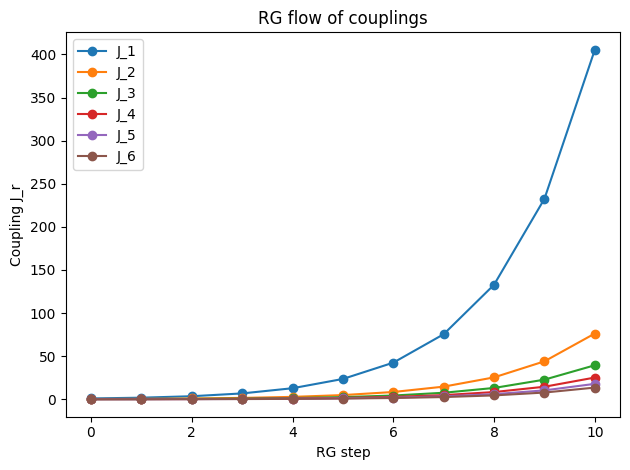


RG step 0:
 [[1.     0.1353]
 [0.1353 1.    ]]

RG step 1:
 [[1.    0.023]
 [0.023 1.   ]]

RG step 2:
 [[1.e+00 8.e-04]
 [8.e-04 1.e+00]]

RG step 3:
 [[1. 0.]
 [0. 1.]]

RG step 4:
 [[1. 0.]
 [0. 1.]]

RG step 5:
 [[1. 0.]
 [0. 1.]]

RG step 6:
 [[1. 0.]
 [0. 1.]]

RG step 7:
 [[1. 0.]
 [0. 1.]]

RG step 8:
 [[1. 0.]
 [0. 1.]]

RG step 9:
 [[1. 0.]
 [0. 1.]]

RG step 10:
 [[1. 0.]
 [0. 1.]]


In [49]:
J0 = 1/1
a = 1.5
max_dist_final = 6
n_steps = 10

J_list, T_list = generate_rg_flow(J0, a, max_dist_final, n_steps, trace_TM=True, TM_r=1)
flows = extract_flows(J_list, max_dist_final)
plot_rg_flow(flows, distances_to_plot=[1, 2, 3, 4, 5, 6, 7, 8])

[print(f"\nRG step {i}:\n", np.round(t, 4)) for i, t in enumerate(T_list)];

# Phase determination

In [11]:
J0 = 1
a = 1.5

phase, step = find_phase(
        J0, a,
        TM_r=1,
        max_dist_final=8,
        n_steps=5,
        threshold=0.1
    )
print(f"Phase at J0={J0}, a={a}: {phase} (decided at step {step})")

Phase at J0=1, a=1.5: ferromagnetic (decided at step 1)


# Critical point

In [3]:
Jc = find_Jc(
    a=1.5,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=6, max_dist_final=5,
    tol=1e-5,
    growth_threshold=1e4, decay_threshold=1e-4
)
print("Critical Jc =", Jc)
print("Critical Tc =", 1/Jc)

Critical Jc = 0.41798577338457105
Critical Tc = 2.3924259237405727


## Critical line

a = 0.7700  →  Jc = 0.001, Tc = 9.97e+02
a = 0.7824  →  Jc = 0.00802, Tc = 1.25e+02
a = 0.7948  →  Jc = 0.0151, Tc = 66.3
a = 0.8073  →  Jc = 0.0221, Tc = 45.2
a = 0.8197  →  Jc = 0.0291, Tc = 34.3
a = 0.8321  →  Jc = 0.0361, Tc = 27.7
a = 0.8445  →  Jc = 0.043, Tc = 23.2
a = 0.8570  →  Jc = 0.0499, Tc = 20.0
a = 0.8694  →  Jc = 0.0568, Tc = 17.6
a = 0.8818  →  Jc = 0.0637, Tc = 15.7
a = 0.8942  →  Jc = 0.0705, Tc = 14.2
a = 0.9067  →  Jc = 0.0773, Tc = 12.9
a = 0.9191  →  Jc = 0.0841, Tc = 11.9
a = 0.9315  →  Jc = 0.0909, Tc = 11.0
a = 0.9439  →  Jc = 0.0976, Tc = 10.2
a = 0.9564  →  Jc = 0.104, Tc = 9.58
a = 0.9688  →  Jc = 0.111, Tc = 9.0
a = 0.9812  →  Jc = 0.118, Tc = 8.49
a = 0.9936  →  Jc = 0.125, Tc = 8.03
a = 1.0061  →  Jc = 0.131, Tc = 7.62
a = 1.0185  →  Jc = 0.138, Tc = 7.25
a = 1.0309  →  Jc = 0.145, Tc = 6.91
a = 1.0433  →  Jc = 0.151, Tc = 6.6
a = 1.0558  →  Jc = 0.158, Tc = 6.32
a = 1.0682  →  Jc = 0.165, Tc = 6.07
a = 1.0806  →  Jc = 0.172, Tc = 5.83
a = 1.0930  →  Jc 

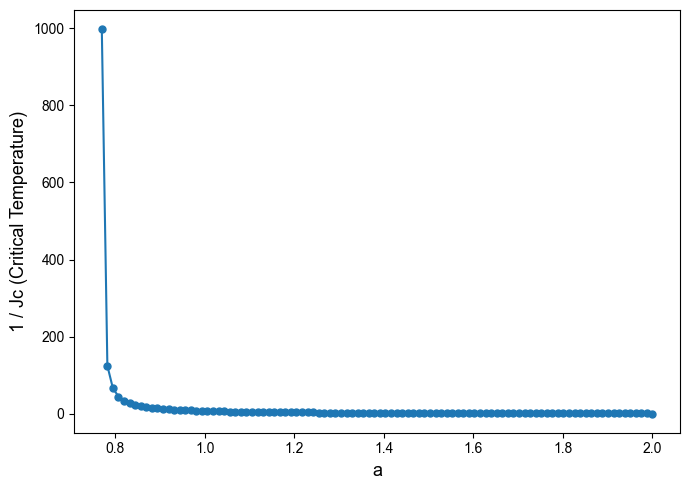

In [12]:
a_vals = np.linspace(.77, 2, 100)
Jc_vals = []
Tc_vals = []

for a in a_vals:
    Jc = find_Jc(
        a=a,
        Jlow=1e-3, Jhigh=1e2,
        max_steps=6, max_dist_final=6,
        tol=1e-5,
        growth_threshold=1e4, decay_threshold=1e-4
    )
    Jc_vals.append(Jc)
    Tc_vals.append(1.0 / Jc)
    print(f"a = {a:.4f}  →  Jc = {Jc:.3}, Tc = {1/Jc:.3}")

Jc_vals = np.array(Jc_vals)
Tc_vals = np.array(Tc_vals)

# ----- plot -----
plt.figure(figsize=(7,5))
plt.plot(a_vals, Tc_vals, 'o-', ms=5)
plt.xlabel("a", fontsize=13)
plt.ylabel("1 / Jc (Critical Temperature)", fontsize=13)
plt.grid(False)
plt.tight_layout()
plt.show()

# Fixed point

In [8]:
a = 1
tolerance = 1e-5

Jc = find_Jc(
    a=a,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=6, max_dist_final=5,
    tol=tolerance,
    growth_threshold=1e4, decay_threshold=1e-4
)
print("Critical J =", Jc)

J0 = build_initial_guess(Jc, a=a, D=200)

J_star, info = newton_rg_lstsq(J0, verbose=True)
print("Fixed point J*:\n", J_star)

Critical J = 0.12799049526453016
[lstsq] iter 0: D=200, D1=66, ||J'-J||=1.960e-02
[lstsq] iter 1: D=200, D1=66, ||J'-J||=1.367e-02
[lstsq] iter 2: D=200, D1=66, ||J'-J||=8.602e-03
[lstsq] iter 3: D=200, D1=66, ||J'-J||=5.268e-03
[lstsq] iter 4: D=200, D1=66, ||J'-J||=1.874e-03
[lstsq] iter 5: D=200, D1=66, ||J'-J||=3.904e-04
[lstsq] iter 6: D=200, D1=66, ||J'-J||=1.304e-04
[lstsq] iter 7: D=200, D1=66, ||J'-J||=5.472e-05
[lstsq] iter 8: D=200, D1=66, ||J'-J||=2.147e-05
[lstsq] iter 9: D=200, D1=66, ||J'-J||=7.297e-06
Fixed point J*:
 [0.         0.12242913 0.05533485 0.03232251 0.02482908 0.022188
 0.02103317 0.01699398 0.01350825 0.01072418 0.00987416 0.00938945
 0.0089723  0.00849432 0.00820056 0.00792457 0.00782142 0.00787141
 0.00788337 0.0072592  0.00662165 0.00606923 0.00566228 0.00525101
 0.00488706 0.00450457 0.00409968 0.0037425  0.00367203 0.00363021
 0.00357539 0.00350288 0.00344999 0.00338925 0.00333532 0.00329874
 0.00325412 0.00318257 0.00312    0.00305597 0.00302074 0.00

In [9]:
err = check_fixed_point(J_star, tol=tolerance)

Fixed-point error norm = 2.456e-06
✔ Fixed point verified.


# Thermal exponent yT

In [34]:
a = .98
N = 1000

Jc = find_Jc(
    a=a,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=6, max_dist_final=5,
    tol=1e-5, growth_threshold=1e4, decay_threshold=1e-4
)
J0 = build_initial_guess(Jc, a=a, D=N)
J_star, info = newton_rg_lstsq(J0, verbose=False)

T, J_head = recursion_matrix_at_fixed_point(J_star, N)
y_T, lambda_T, eigs = thermal_exponent_from_T(T, b=3.0)

print("Largest relevant eigenvalue λ_T:", lambda_T)
print("Thermal scaling exponent y_T:", y_T)
print("Correlation length exponent ν ≈ 1/y_T:", 1.0/y_T)

Largest relevant eigenvalue λ_T: (1.0442915858807107+0j)
Thermal scaling exponent y_T: 0.0394486278116333
Correlation length exponent ν ≈ 1/y_T: 25.34942418719828


In [30]:
eigvals = np.linalg.eigvals(T)
sorted(eigvals, key=lambda z: abs(z), reverse=True)

[np.complex128(0.9192612128050655+0j),
 np.complex128(0.2816243583784812+0.5832769306273999j),
 np.complex128(0.2816243583784812-0.5832769306273999j),
 np.complex128(-0.28685238540515234+0.4504715919158681j),
 np.complex128(-0.28685238540515234-0.4504715919158681j),
 np.complex128(-0.49241816019438156+0j),
 np.complex128(-0.07132686766022356+0j),
 np.complex128(-0.036776474800989715+0.05539590197778245j),
 np.complex128(-0.036776474800989715-0.05539590197778245j),
 np.complex128(0.030915640573921106+0.05300511017368809j),
 np.complex128(0.030915640573921106-0.05300511017368809j),
 np.complex128(0.05346509533244396+0j),
 np.complex128(-0.005125709040049381+0j),
 np.complex128(-5.0542586480917926e-05+4.7849369529639414e-05j),
 np.complex128(-5.0542586480917926e-05-4.7849369529639414e-05j),
 np.complex128(4.2659492944909175e-05+4.824793552894552e-05j),
 np.complex128(4.2659492944909175e-05-4.824793552894552e-05j),
 np.complex128(3.578586133550879e-05+1.973423753278621e-05j),
 np.complex12

## Stability of yT with N

In [ ]:
# ----- parameters -----
b = 3.0
N_min = 20
N_max = len(J_star) - 1    # maximum allowed head size

Ns = []
lambda_Ts = []
yTs = []

# ----- main sweep -----
for N in range(N_min, N_max + 1, 20):
    T, J_head = recursion_matrix_at_fixed_point(J_star, N)
    y_T, lambda_T, eigs = thermal_exponent_from_T(T, b)

    
    Ns.append(N)
    lambda_Ts.append(lambda_T.real)
    yTs.append(y_T.real)

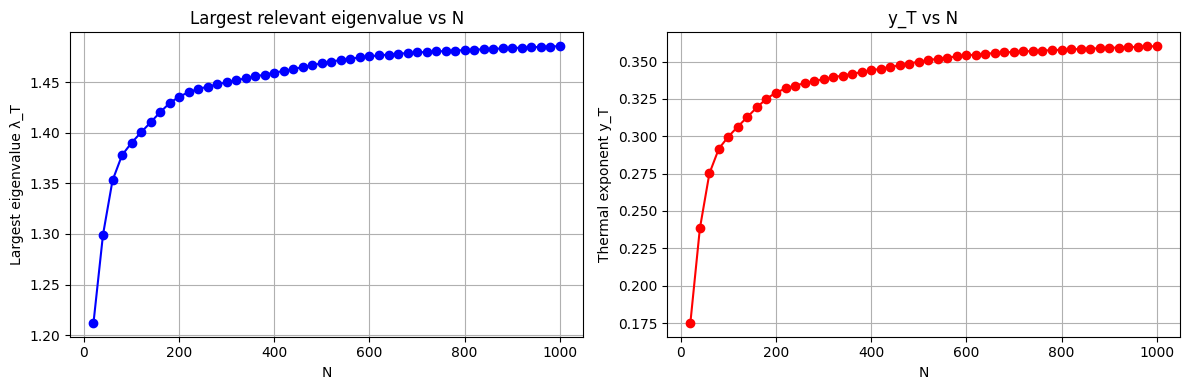

In [27]:
# ----- plots -----
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(Ns, lambda_Ts, 'b-o')
ax[0].set_xlabel("N")
ax[0].set_ylabel("Largest eigenvalue λ_T")
ax[0].set_title("Largest relevant eigenvalue vs N")
ax[0].grid()

ax[1].plot(Ns, yTs, 'r-o')
ax[1].set_xlabel("N")
ax[1].set_ylabel("Thermal exponent y_T")
ax[1].set_title("y_T vs N")
ax[1].grid()

plt.tight_layout()
plt.savefig("../figures/yT_stability.png")
plt.show()

# Magnetization

## Single a

In [35]:
a = 1
tolerance = 1e-5

Jc = find_Jc(
    a=a,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=6, max_dist_final=5,
    tol=tolerance,
    growth_threshold=1e4, decay_threshold=1e-4
)
print("Critical J =", Jc)

J0 = build_initial_guess(Jc, a=a, D=200)
J_star, info = newton_rg_lstsq(J0, verbose=True)
print("Fixed point J*:\n", J_star)
err = check_fixed_point(J_star, tol=tolerance)
print()
yH, alphaH = magnetic_exponent_yH(J_star, eps=1e-8, b=3.0)
print("dH'/dH at fixed point =", alphaH)
print("y_H =", yH)

Critical J = 0.12799049526453016
[lstsq] iter 0: D=200, D1=66, ||J'-J||=1.960e-02
[lstsq] iter 1: D=200, D1=66, ||J'-J||=1.367e-02
[lstsq] iter 2: D=200, D1=66, ||J'-J||=8.602e-03
[lstsq] iter 3: D=200, D1=66, ||J'-J||=5.268e-03
[lstsq] iter 4: D=200, D1=66, ||J'-J||=1.874e-03
[lstsq] iter 5: D=200, D1=66, ||J'-J||=3.904e-04
[lstsq] iter 6: D=200, D1=66, ||J'-J||=1.304e-04
[lstsq] iter 7: D=200, D1=66, ||J'-J||=5.472e-05
[lstsq] iter 8: D=200, D1=66, ||J'-J||=2.147e-05
[lstsq] iter 9: D=200, D1=66, ||J'-J||=7.297e-06
Fixed point J*:
 [0.         0.12242913 0.05533485 0.03232251 0.02482908 0.022188
 0.02103317 0.01699398 0.01350825 0.01072418 0.00987416 0.00938945
 0.0089723  0.00849432 0.00820056 0.00792457 0.00782142 0.00787141
 0.00788337 0.0072592  0.00662165 0.00606923 0.00566228 0.00525101
 0.00488706 0.00450457 0.00409968 0.0037425  0.00367203 0.00363021
 0.00357539 0.00350288 0.00344999 0.00338925 0.00333532 0.00329874
 0.00325412 0.00318257 0.00312    0.00305597 0.00302074 0.00

In [36]:
J = Jc+.001
M = magnetization(J, a, Jc, max_dist_final=5, max_steps=10)
print("M =", M)

M = 0.004578677665505217


Jc = 0.4238417166098952


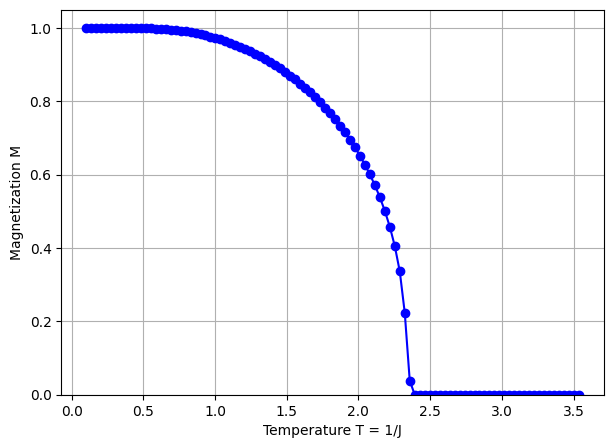

In [51]:
# Parameters
a = 1.5
Jc = find_Jc(
    a=a,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=8, max_dist_final=6,
    tol=1e-6, growth_threshold=1e4, decay_threshold=1e-4
)

print(f"Jc = {Jc}")
T_values = np.linspace(0.1, 1.5/Jc, 100)
J_values = 1.0 / T_values

M_values = [magnetization(J0, a, Jc,
                          max_dist_final=6,
                          max_steps=12,
                          eps=1e-8) for J0 in J_values]

plt.figure(figsize=(7, 5))
plt.plot(T_values, M_values, 'b-o')
plt.xlabel("Temperature T = 1/J")
plt.ylabel("Magnetization M")
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()

## Multiple a's

Processing a = 0.0
Processing a = 0.2
Processing a = 0.4
Processing a = 0.6


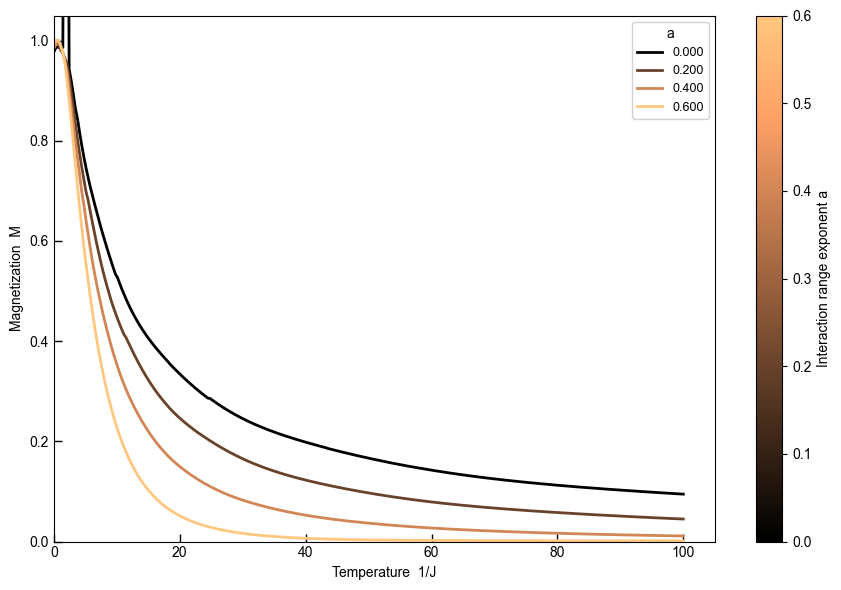

In [118]:
from matplotlib import cm

a_values = np.array([0.0 , 0.2, 0.4, 0.6])
data_by_a = []

for a in a_values:
    print(f"Processing a = {a}")

    if a < 0.8:
        Jc = 1e-10
        T_arr = np.linspace(0.10, 100, 300)
        J_arr = 1.0 / T_arr
    else:
        Jc = find_Jc(
            a=a,
            Jlow=1e-2, Jhigh=1e2,
            max_steps=10,
            max_dist_final=6,
            tol=1e-6,
            growth_threshold=1e4,
            decay_threshold=1e-4
        )
        T_arr = np.linspace(0.10, 1.1 / Jc, 100)
        J_arr = 1.0 / T_arr


    M_arr = []
    for J0 in J_arr:
        T = 1/J0
        if T < 0.8: max_k = 8
        else: max_k = 10
        M_arr.append(magnetization(J0, a, Jc, max_dist_final=6, max_steps=max_k, eps=1e-8))    
    M_arr = np.array(M_arr)

    data_by_a.append(list(zip(T_arr, M_arr)))

# Plot
fig, ax = plt.subplots(figsize=(9, 6))
cmap = cm.copper
norm = plt.Normalize(a_values.min(), a_values.max())

for a, tuples_a in zip(a_values, data_by_a):
    T_arr = np.array([x[0] for x in tuples_a])
    M_arr = np.array([x[1] for x in tuples_a])
    ax.plot(T_arr, M_arr, label=f"{a:.3f}", color=cmap(norm(a)), linewidth=2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, ax=ax, label='Interaction range exponent a')
ax.set_xlabel('Temperature  1/J')
ax.set_ylabel('Magnetization  M')
ax.set_xlim(0, None)
ax.set_ylim(0, 1.05)
ax.legend(title='a', loc='upper right', fontsize=9, framealpha=.9)
ax.tick_params(axis='both', which='major', direction='in', width=1, length=6)
plt.tight_layout()
plt.show()

In [ ]:
from matplotlib import cm

a_values = np.array([0.0 , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 1.9, 2.0 ])
data_by_a = []

for a in a_values:
    print(f"Processing a = {a}")

    Jc = find_Jc(
        a=a,
        Jlow=1e-5, Jhigh=1e2,
        max_steps=10,
        max_dist_final=6,
        tol=1e-6,
        growth_threshold=1e4,
        decay_threshold=1e-4
    )

    T_arr = np.linspace(0.10, 1.5 / Jc, 300)
    J_arr = 1.0 / T_arr

    M_arr = np.array([
        magnetization(J0, a, Jc, max_dist_final=6, max_steps=10, eps=1e-8)
        for J0 in J_arr
    ])

    data_by_a.append(list(zip(T_arr, M_arr)))

# Plot
fig, ax = plt.subplots(figsize=(9, 6))
cmap = cm.copper
norm = plt.Normalize(a_values.min(), a_values.max())

for a, tuples_a in zip(a_values, data_by_a):
    T_arr = np.array([x[0] for x in tuples_a])
    M_arr = np.array([x[1] for x in tuples_a])
    ax.plot(T_arr, M_arr, label=f"{a:.3f}", color=cmap(norm(a)), linewidth=2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, ax=ax, label='Interaction range exponent a')
ax.set_xlabel('Temperature  1/J')
ax.set_ylabel('Magnetization  M')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1.05)
ax.legend(title='a', loc='upper right', fontsize=9, framealpha=.9)
ax.tick_params(axis='both', which='major', direction='in', width=1, length=6)
plt.tight_layout()
plt.show()

## Save data

In [86]:
# Save data for each a to its own file
for a, tuples_a in zip(a_values, data_by_a):
    T_arr = np.array([x[0] for x in tuples_a])
    M_arr = np.array([x[1] for x in tuples_a])
    out = np.column_stack((T_arr, M_arr))

    filename = f"../data/magnetization/magnetization_a_{a:.3f}.txt"
    np.savetxt(
        filename, out,
        header="T\tM",
        fmt="%.12e",
        comments=""
    )
    print("Saved:", filename)

Saved: ../data/magnetization/magnetization_a_0.000.txt
Saved: ../data/magnetization/magnetization_a_0.200.txt
Saved: ../data/magnetization/magnetization_a_0.400.txt
Saved: ../data/magnetization/magnetization_a_0.600.txt
Saved: ../data/magnetization/magnetization_a_0.800.txt
Saved: ../data/magnetization/magnetization_a_1.000.txt
Saved: ../data/magnetization/magnetization_a_1.200.txt
Saved: ../data/magnetization/magnetization_a_1.400.txt
Saved: ../data/magnetization/magnetization_a_1.600.txt
Saved: ../data/magnetization/magnetization_a_1.800.txt
Saved: ../data/magnetization/magnetization_a_1.900.txt
Saved: ../data/magnetization/magnetization_a_2.000.txt


## Load data

In [10]:
# Load data for each a from its own file
import numpy as np

# a-values used originally
a_values = np.array([0.0 , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 1.9, 2.0])

data_by_a = []

for a in a_values:
    filename = f"../data/magnetization/magnetization_a_{a:.3f}.txt"
    print("Loading:", filename)

    # If file has a header "T M", skiprows=1 handles it.
    arr = np.loadtxt(filename, skiprows=1)

    T_arr = arr[:, 0]
    M_arr = arr[:, 1]

    data_by_a.append(list(zip(T_arr, M_arr)))

Loading: ../data/magnetization/magnetization_a_0.000.txt
Loading: ../data/magnetization/magnetization_a_0.200.txt
Loading: ../data/magnetization/magnetization_a_0.400.txt
Loading: ../data/magnetization/magnetization_a_0.600.txt
Loading: ../data/magnetization/magnetization_a_0.800.txt
Loading: ../data/magnetization/magnetization_a_1.000.txt
Loading: ../data/magnetization/magnetization_a_1.200.txt
Loading: ../data/magnetization/magnetization_a_1.400.txt
Loading: ../data/magnetization/magnetization_a_1.600.txt
Loading: ../data/magnetization/magnetization_a_1.800.txt
Loading: ../data/magnetization/magnetization_a_1.900.txt
Loading: ../data/magnetization/magnetization_a_2.000.txt


/var/folders/p_/j__hv0j95yv8xknt5_nvt4pw0000gn/T/ipykernel_69814/1581770836.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


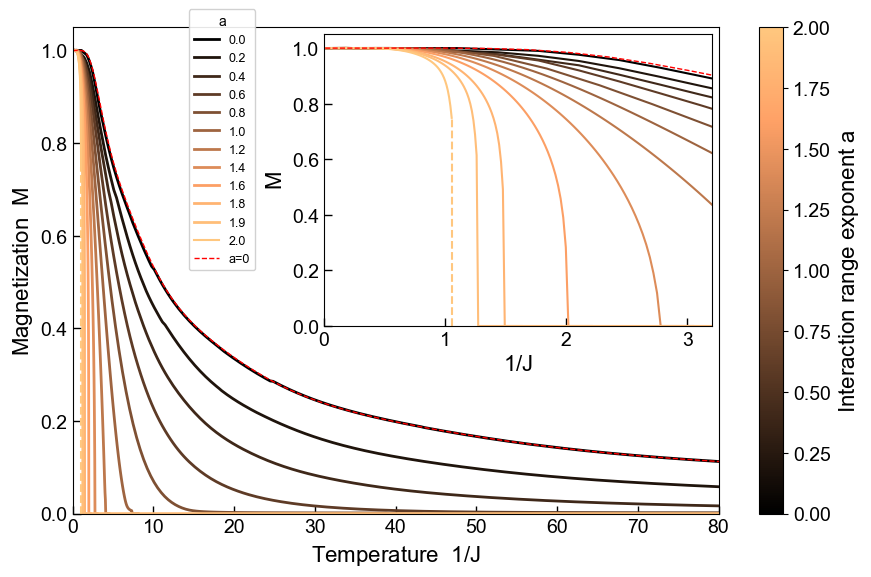

In [16]:
from matplotlib import cm

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'mathtext.default': 'regular'})

fig, ax = plt.subplots(figsize=(9, 6))
cmap = cm.copper
norm = plt.Normalize(a_values.min(), a_values.max())

# Main plot
for a, tuples_a in zip(a_values, data_by_a):
    T_arr = np.array([x[0] for x in tuples_a])
    M_arr = np.array([x[1] for x in tuples_a])
    if a != max(a_values):
        ax.plot(T_arr, M_arr, label=f"{a:.1f}", color=cmap(norm(a)), linewidth=2)
    else:
        i = np.where(T_arr==1.054473426129e+00)[0][0]
        ax.plot(T_arr[:i+1], M_arr[:i+1], marker='', label=f'{a:.1f}', color=cmap(norm(a)), linewidth=1.5)
        ax.plot([T_arr[i], T_arr[i]], [0, M_arr[i]], linestyle='--', color=cmap(norm(a)), linewidth=1.5)


# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Interaction range exponent $a$', fontsize=16)
cbar.ax.tick_params(labelsize=14) 

ax.set_xlabel('Temperature  $1/J$', fontsize=16)
ax.set_ylabel('Magnetization  $M$', fontsize=16)
ax.set_xlim(0, 80)
ax.set_ylim(0, 1.05)
ax.legend(title='a', loc=(0.18, 0.5), fontsize=9, framealpha=.9)
ax.tick_params(axis='both', which='major', direction='in', labelsize=14, width=1, length=6)

# --- Inset axis (upper right) ---
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

inset = inset_axes(ax, width="60%", height="60%", loc="upper right")

# Plot into inset
for a, tuples_a in zip(a_values, data_by_a):
    T_arr = np.array([x[0] for x in tuples_a])
    M_arr = np.array([x[1] for x in tuples_a])
    if a != max(a_values):
        inset.plot(T_arr, M_arr, color=cmap(norm(a)), linewidth=1.5)
    else:
        #i = np.where(T_arr==1.054473426129e+00)[0][0]
        inset.plot(T_arr[:i+1], M_arr[:i+1], marker='', label=f'{a:.2f}', color=cmap(norm(a)), linewidth=1.5)
        inset.plot([T_arr[i], T_arr[i]], [0, M_arr[i]], linestyle='--', color=cmap(norm(a)), linewidth=1.5)

# Set x-axis limits for zoom
inset.set_xlabel('$1/J$', fontsize=16)
inset.set_ylabel('$M$', fontsize=16)
inset.set_xlim(0, 3.2)
inset.set_ylim(0, 1.05)
inset.tick_params(axis='both', which='major', direction='in', labelsize=14, width=1, length=6)

plt.tight_layout()
plt.savefig("magnetization.png")
plt.show()

# Critical exponents

In [7]:
result = compute_exponents_over_a(
    a_min=1, a_max=2.0,
    num_points=10,
    D_init=300, N_matrix=300,
    d_dim=1.0, b=3.0
)

a = result["a"]
exps = [
    ("yT",     result["yT"]),
    ("yH",     result["yH"]),
    ("β",      result["beta"]),
    ("δ",      result["delta"]),
    ("η",      result["eta"]),
    ("ν",      result["nu"]),
    ("α",      result["alpha"]),
    ("γ",      result["gamma"]),
]


=== Computing exponents at a = 1.0000 ===
  yT = 0.012026417701829155
  yH = 0.5011500539195503
  ν=83.1503, β=41.4795, δ=1.0046, η=1.9977, α=-81.1503, γ=0.1913

=== Computing exponents at a = 1.1111 ===
  yT = 0.12947720591621606
  yH = 0.56009229680233
  ν=7.7234, β=3.3976, δ=1.2732, η=1.8798, α=-5.7234, γ=0.9282

=== Computing exponents at a = 1.2222 ===
  yT = 0.21598853873113094
  yH = 0.6162363554132185
  ν=4.6299, β=1.7768, δ=1.6058, η=1.7675, α=-2.6299, γ=1.0763

=== Computing exponents at a = 1.3333 ===
  yT = 0.28183015220298435
  yH = 0.6694767775484318
  ν=3.5482, β=1.1728, δ=2.0255, η=1.6610, α=-1.5482, γ=1.2027

=== Computing exponents at a = 1.4444 ===
  yT = 0.3312390920538422
  yH = 0.719677879716543
  ν=3.0190, β=0.8463, δ=2.5673, η=1.5606, α=-1.0190, γ=1.3264

=== Computing exponents at a = 1.5556 ===
  yT = 0.3661678425440614
  yH = 0.7666789749547216
  ν=2.7310, β=0.6372, δ=3.2859, η=1.4666, α=-0.7310, γ=1.4566

=== Computing exponents at a = 1.6667 ===
  yT = 0.3

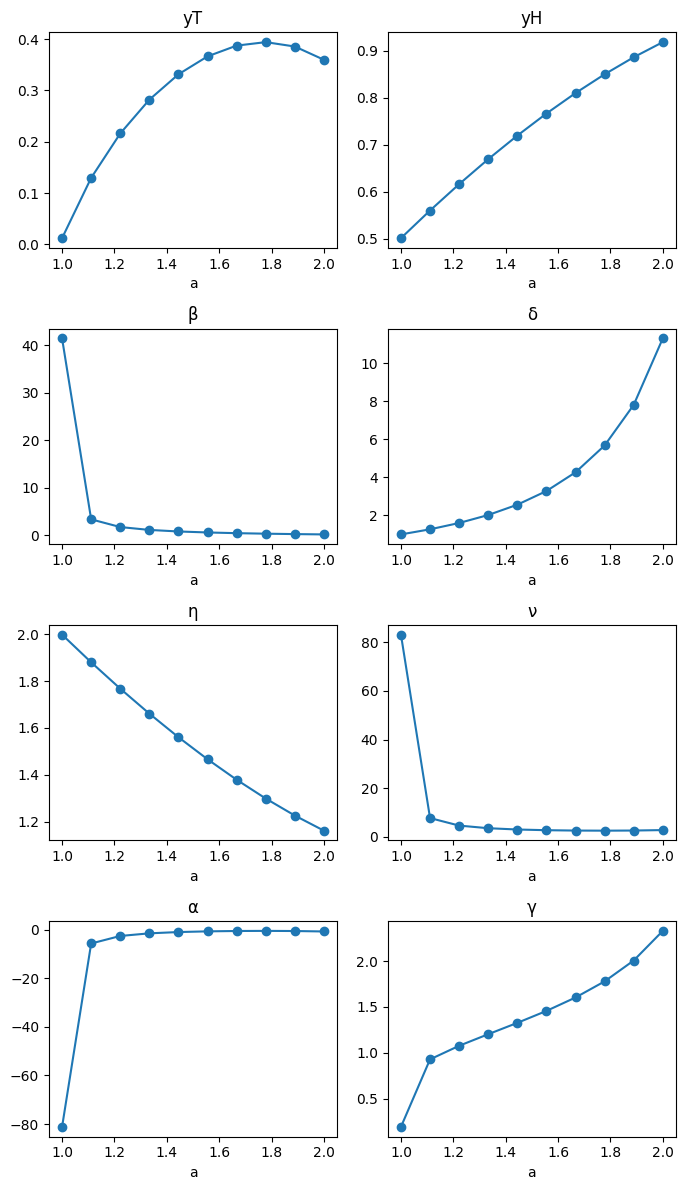

In [8]:
fig, axes = plt.subplots(4, 2, figsize=(7, 12))
axes = axes.flatten()

for i, (name, vals) in enumerate(exps):
    ax = axes[i]
    ax.plot(a, vals, marker="o")
    ax.set_title(name)
    ax.set_xlabel("a")
    ax.grid(False)
plt.tight_layout()
#plt.savefig("../figures/exponents_new.png")
plt.show()

# Energy density

In [12]:
@njit(cache=True)
def G_r_prime(r, J):
    log_R_pp, log_R_pm = log_Rpp_Rpm(r, J)
    G_r = 0.5 * (log_R_pp + log_R_pm) # H=0: G_r' = 1/2 ln(R++ R+-)
    return G_r

@njit(cache=True)
def G_prime(J):
    D = len(J) - 1
    r_max = (D - 2) // 3
    if r_max < 1:
        # Numba cannot raise ValueError cleanly in nopython mode,
        # but we can still raise a generic error or return a sentinel.
        raise ValueError("Not enough range in J to perform another RG step.")

    G_new = np.zeros(r_max + 1, dtype=np.float64)
    for r in range(1, r_max + 1):
        log_R_pp, log_R_pm = log_Rpp_Rpm(r, J)
        G_new[r] = 0.5 * (log_R_pp + log_R_pm) # G'_r

    return G_new

def build_J_full(J0, a, D):
    J = np.zeros(D+1)
    r = np.arange(1, D+1)
    J[1:] = J0 / (r**a)
    return J


@njit(cache=True)
def G_k(J):
    """
    Compute G^{(k)} = sum_r G_r(J) for all distances r allowed at this RG step.

    G_r = 1/2 (ln R_{++} + ln R_{+-}).
    """
    D = len(J) - 1
    r_max = (D - 2) // 3
    if r_max < 1:
        return 0.0

    Gr = 0.0
    for r in range(1, r_max + 1):
        log_pp, log_pm = log_Rpp_Rpm(r, J)
        Gr += 0.5 * (log_pp + log_pm)

    return Gr


def phi_from_G(J_init, max_steps=8):
    """
    Compute full cumulative free-energy φ from all G^{(k)}.

        φ = sum_k 3^{-(k+1)} * G_step(J^{(k)})
    """
    J = J_init.copy()
    phi = 0.0
    weight = 1.0 / 3.0

    for k in range(max_steps):
        # Add contribution from this RG step
        phi += weight * G_k(J)

        # Apply RG
        J = rg_step(J)
        weight /= 3.0

    return phi


def u_r(T, a, r_list, max_steps=8, R_final=5, dJ_rel=1e-3):
    """
    u_r = ∂φ / ∂J_r

    - G is computed by summing over all distances at each step.
    - r_list only determines which u_r will be computed.
    """
    J0 = 1.0 / T
    r_list = np.array(r_list, dtype=np.int64)

    # Initial full coupling vector
    D_init = (3**max_steps) * R_final
    J_base = build_J_full(J0, a, D_init)

    results = {}

    for r in r_list:
        if r > D_init:
            results[r] = np.nan
            continue

        J_r0 = J_base[r]
        dJ = dJ_rel * abs(J_r0) if J_r0 != 0 else dJ_rel

        # Perturb only distance r
        Jp = J_base.copy()
        Jm = J_base.copy()
        Jp[r] = J_r0 + dJ
        Jm[r] = J_r0 - dJ

        # Compute φ for each
        phi_p = phi_from_G(Jp, max_steps=max_steps)
        phi_m = phi_from_G(Jm, max_steps=max_steps)

        # Derivative
        dphi_dJr = (phi_p - phi_m) / (2.0 * dJ)
        results[r] = dphi_dJr / (D_init/(r+1))

    return results

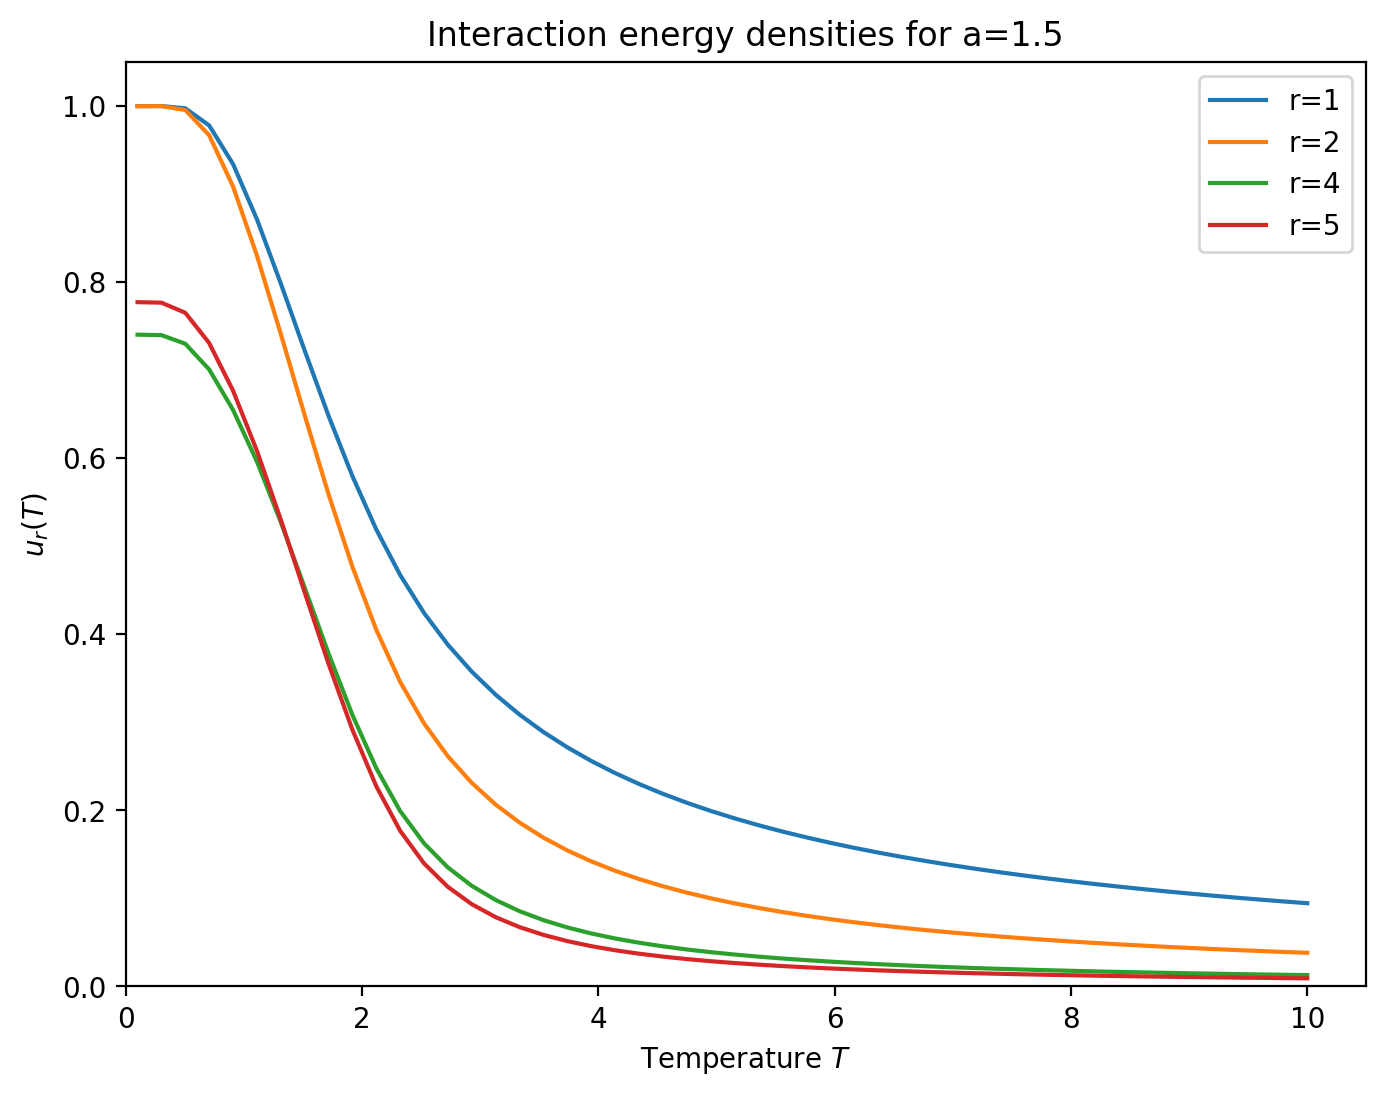

In [16]:
r_values = [1, 2, 4, 5]
a = 1.5
T_values = np.linspace(0.1, 10, 50)

u_results = {r: [] for r in r_values}

for T in T_values:
    ur_dict = u_r(T, a, r_values, max_steps=7, R_final=3**2, dJ_rel=1e-3)
    for r in r_values:
        u_results[r].append(ur_dict[r])


plt.figure(figsize=(8, 6))
for r in r_values:
    plt.plot(T_values, u_results[r], label=f"r={r}")
plt.xlim(0, None)
plt.ylim(0, None)
plt.xlabel("Temperature $T$")
plt.ylabel("$u_r(T)$")
plt.title(f"Interaction energy densities for a={a}")
plt.legend()
plt.show()

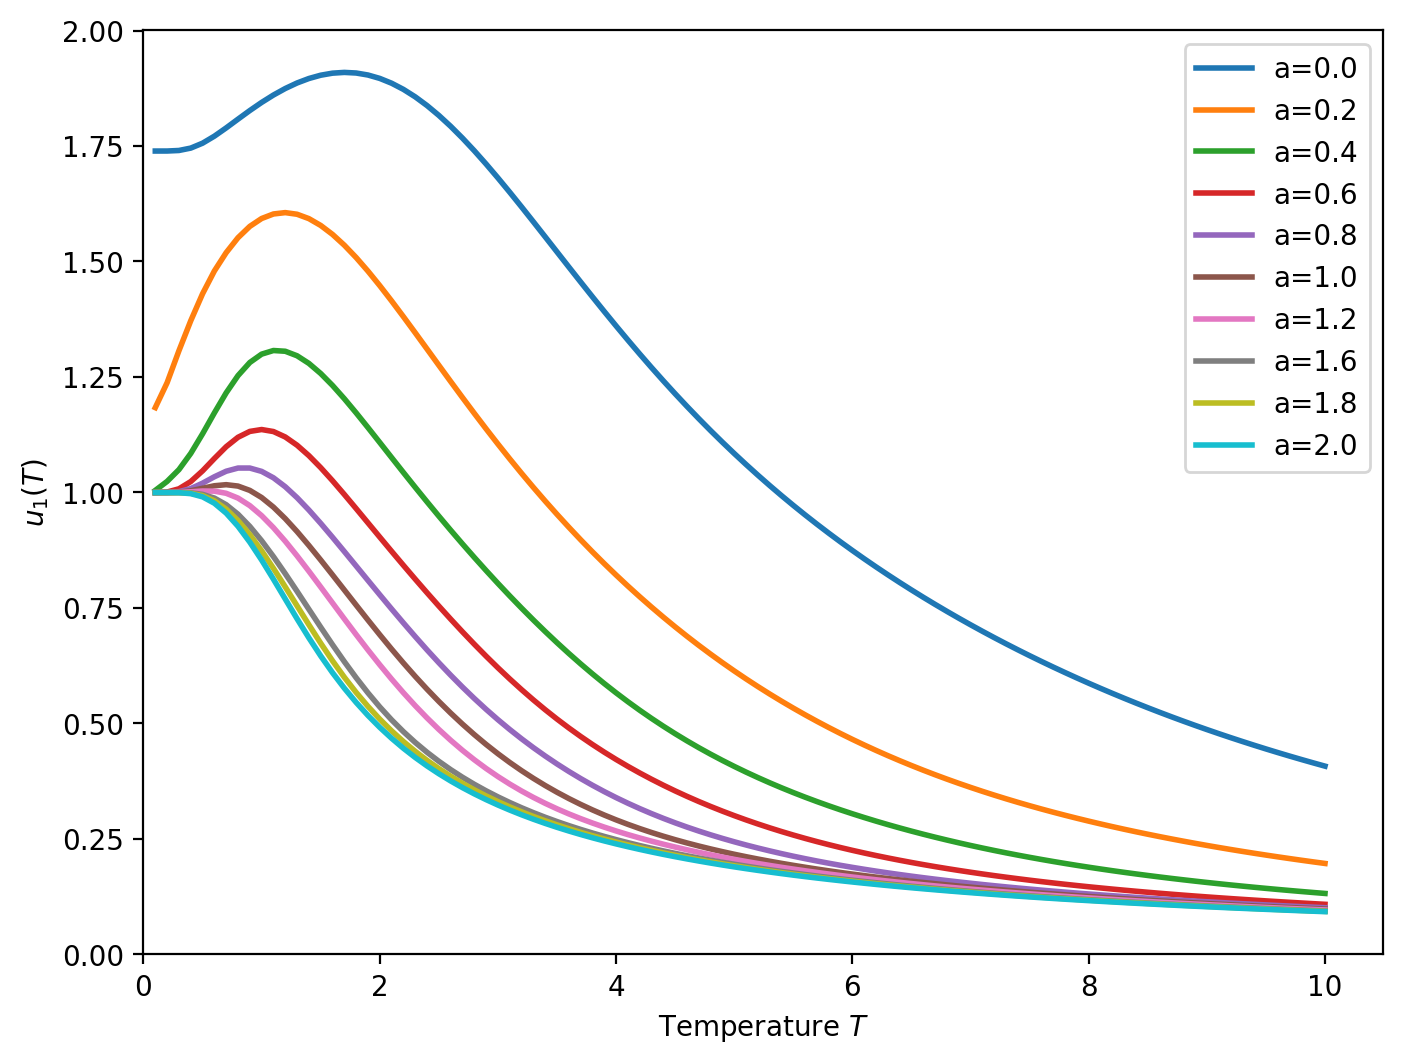

In [17]:
# Choose distances r to evaluate
r_values = [1]

# Choose range of interaction exponents a
a_values = [0., 0.2,0.4,0.6,0.8,1.0, 1.2,1.6,1.8, 2.0]

# Temperature grid
T_values = np.linspace(0.1, 10, 100)

# Compute and store results:
# u_results[a][r] = array of length len(T_values)
u_results = {a: {r: [] for r in r_values} for a in a_values}

for a in a_values:
    for T in T_values:
        ur_dict = u_r(T, a, r_values,
                      max_steps=7,
                      R_final=3**2,
                      dJ_rel=1e-3)
        for r in r_values:
            u_results[a][r].append(ur_dict[r])

# ---------------------------------------------------------
# Plot: One figure per r-value
# ---------------------------------------------------------

for r in r_values:
    plt.figure(figsize=(8, 6))
    
    for a in [0.8,1.0, 1.2,1.6,1.8, 2.0]:
        plt.plot(
            T_values,
            u_results[a][r],
            label=f"a={a}",
            lw=2
        )
    plt.xlim(0, None)
    plt.ylim(0, None)
    plt.xlabel("Temperature $T$")
    plt.ylabel(f"$u_{r}(T)$")
    plt.legend()
    plt.show()